In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Dataset: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=Books_rating.csv

df_all = pd.read_csv('Amazon_review/Books_rating.csv')
df = df_all[['Id', 'review/score', 'review/text']].rename(columns={'Id': 'id', 'review/score': 'score', 'review/text': 'text'}).dropna()
df['score'] = df['score'].astype('str')

df.head()

,id,score,text
0,1882931173,4.0,This is only for Julie Strain fans. It's a col...
1,0826414346,5.0,I don't care much for Dr. Seuss but after read...
2,0826414346,5.0,"If people become the books they read and if ""t..."
3,0826414346,4.0,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,4.0,Philip Nel - Dr. Seuss: American IconThis is b...


In [3]:
df.describe()

,id,score,text
count,2999992,2999992,2999992
unique,221998,5,2062648
top,B000IEZE3G,5.0,digital books are perfect and easy to use! The...
freq,6796,1807335,322


## Text processing

In [4]:
# Implementation from Dr.Yulia
# https://wustl.instructure.com/courses/100198/files/6153908/download?download_frd=1


#module for supressing warnings about future changes in Python:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#module sys helps install modules from inside Jupyter:
import sys

#html parser for digesting text taken from web-pages
!{sys.executable} -m pip install html.parser
import html.parser
from html.parser import HTMLParser

#module for handling regular expressions and special characters
import re

#Natural Language ToolKit
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

#modules for handling unicode characters and strings
import unicodedata
import string
!{sys.executable} -m pip install pattern3
import pattern3

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#pretty printing
from pprint import pprint

# Plotting tools
!{sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

wnl = WordNetLemmatizer()
html_parser = HTMLParser()

contraction_mapping = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
                                 'also','would']


nltk.download('punkt')

def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
 

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def pos_tag_text(text_tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None  
    tagged_text = nltk.pos_tag(text_tokens)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text



def lemmatize_text(text):
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
 

    
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub(' ', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text 


def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text


class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
    
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()


def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8')
    return text


def normalize_corpus(corpus, only_text_chars=True):
    normalized_corpus = []  
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, contraction_mapping)
        text = tokenize_text(text)
        text = lemmatize_text(text)
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        #text = tokenize_text(text)
        normalized_corpus.append(text)    
    return normalized_corpus

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darktion\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Normalize text data and prepare for further process

sample_size = 10000
norm_text_sample = normalize_corpus(df['text'][:sample_size])
#norm_text = normalize_corpus(df['text'])


labels_sample = df['score'][:sample_size]
#labels = df['stars']

# BOW
vectorizer_BOW = CountVectorizer(max_features=2000) 
BOW_matrix = vectorizer_BOW.fit_transform(norm_text_sample).toarray()

text_sample_vectorized = pd.DataFrame(np.round(BOW_matrix,2), columns=vectorizer_BOW.get_feature_names_out())

# Spliting training set and test set
X_train, X_test, y_train, y_test = train_test_split(text_sample_vectorized, labels_sample, train_size=0.7, random_state=42)

In [6]:
word_freq = BOW_matrix.sum(axis=0)

labels_sample

0       4.0
1       5.0
2       5.0
3       4.0
4       4.0
       ... 
9995    5.0
9996    5.0
9997    3.0
9998    5.0
9999    5.0
Name: score, Length: 10000, dtype: object

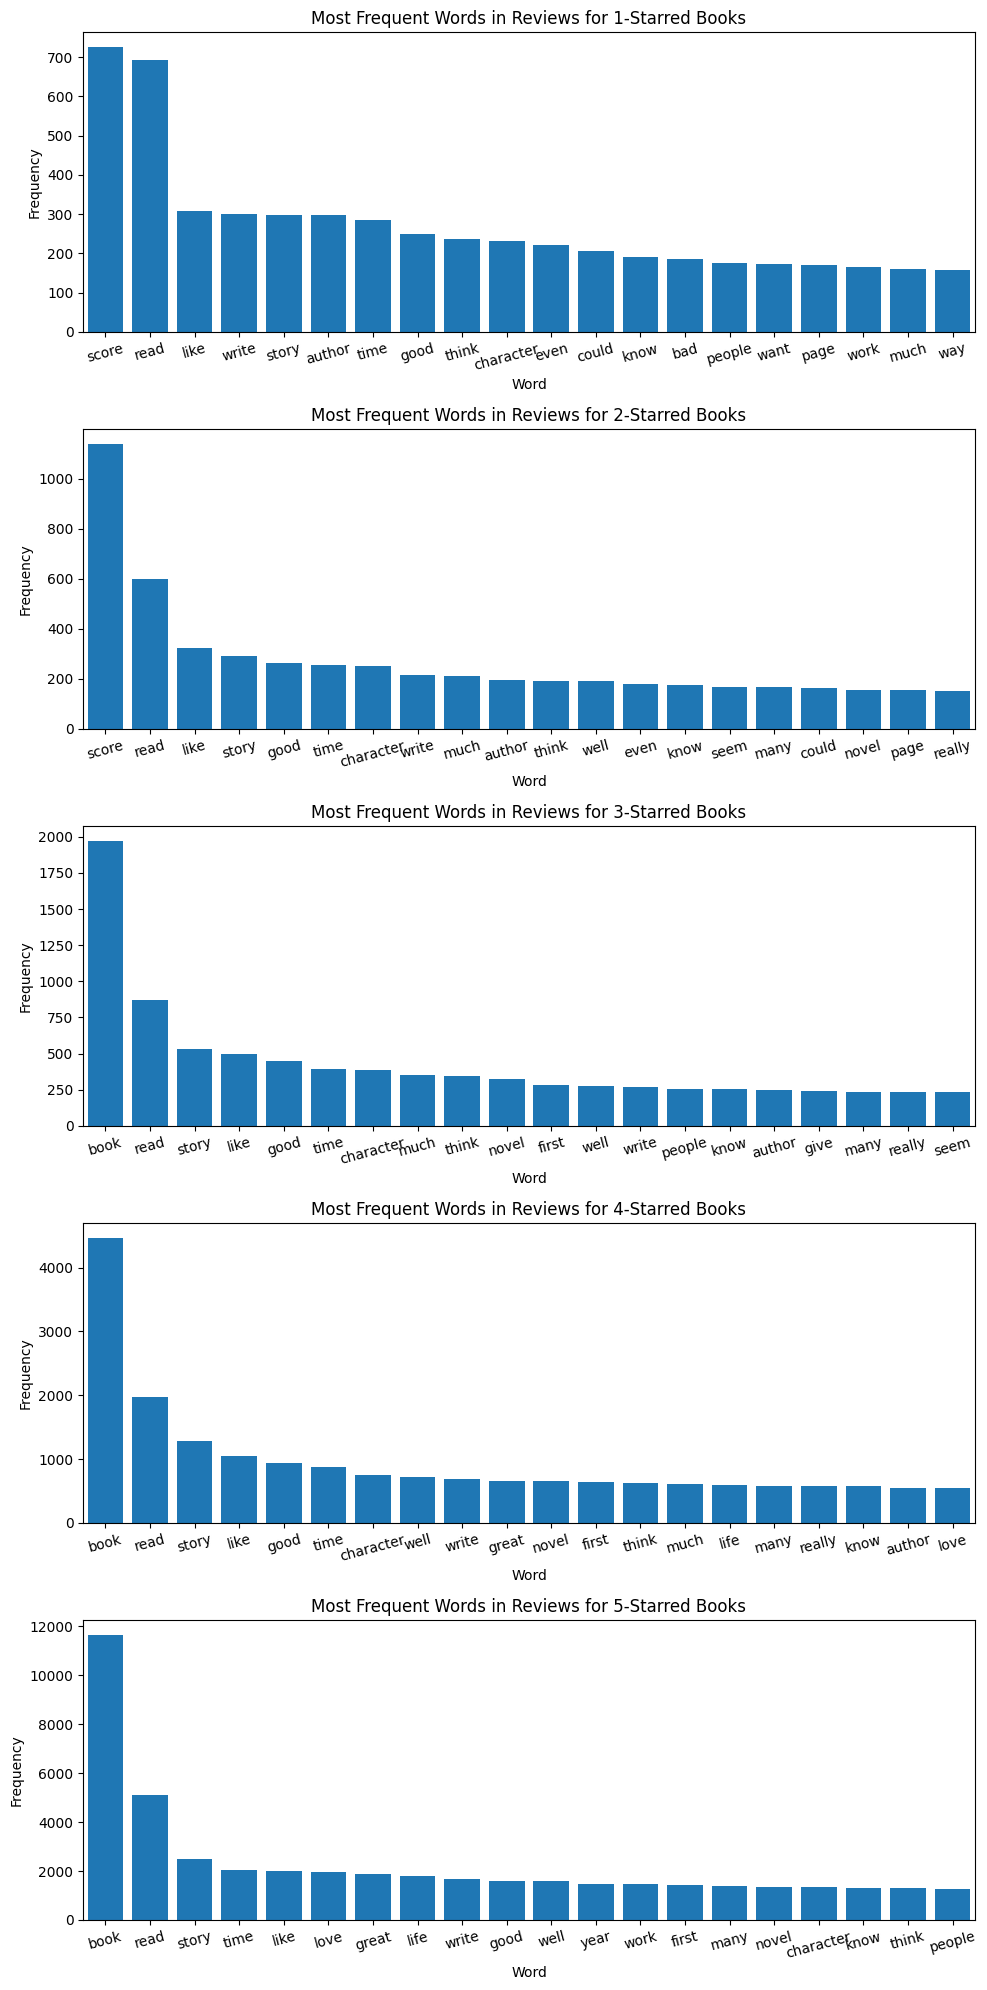

In [7]:
# create a dataframe with word frequency for each score
df_v = text_sample_vectorized.copy()
df_v['score'] = labels_sample.astype(float)

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# plot histogram for each score
for i in range(1, 6):
    df_v_i = df_v[df_v['score'] == i].sum(axis=0).sort_values(ascending=False).reset_index()[1:21].rename(columns={'index': 'word', 0: 'frequency'})
    axs[i-1].bar(df_v_i['word'], df_v_i['frequency'])
    axs[i-1].set_xlabel('Word')
    axs[i-1].set_ylabel('Frequency')
    axs[i-1].set_title(f'Most Frequent Words in Reviews for {i}-Starred Books')
    axs[i-1].tick_params(axis='x', labelrotation=15)
    axs[i-1].xaxis.set_major_locator(plt.MaxNLocator(20))
    axs[i-1].set_xlim([-0.5, 19.5])
    
plt.tight_layout()
plt.show()


In [8]:
# Evaluating classification model perforamnce
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def display_score(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print("Train Accuracy : ", accuracy_score(y_train, train_pred))
    print("Test Accuracy : ", accuracy_score(y_test, test_pred))

    print("Train Classification Report : \n", classification_report(y_train, train_pred))
    print("Test Classification Report : \n", classification_report(y_test, test_pred))

    print("Train F1-Score : ", f1_score(y_train, train_pred, average='weighted'))
    print("Test F1-Score : ", f1_score(y_test, test_pred, average='weighted'))

    print("Train Precision : ", precision_score(y_train, train_pred, average='weighted'))
    print("Test Precision : ", precision_score(y_test, test_pred, average='weighted'))

    print("Train Recall : ", recall_score(y_train, train_pred, average='weighted'))
    print("Test Recall : ", recall_score(y_test, test_pred, average='weighted'))

# Train Models

## Logistic Regression 

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

display_score(lr)

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy :  0.8862857142857142
Test Accuracy :  0.5476666666666666
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.97      0.90      0.93       519
         2.0       0.98      0.85      0.91       403
         3.0       0.94      0.79      0.86       604
         4.0       0.86      0.71      0.78      1442
         5.0       0.87      0.96      0.92      4032

    accuracy                           0.89      7000
   macro avg       0.92      0.84      0.88      7000
weighted avg       0.89      0.89      0.88      7000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.38      0.34      0.36       208
         2.0       0.19      0.14      0.16       167
         3.0       0.18      0.16      0.17       263
         4.0       0.29      0.28      0.29       620
         5.0       0.71      0.77      0.74      1742

    accuracy                           0.55      

## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

# instantiate a Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()

# fit the model on the training data
nb_clf.fit(X_train, y_train)
display_score(nb_clf)

Train Accuracy :  0.6688571428571428
Test Accuracy :  0.56
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.53      0.71      0.61       519
         2.0       0.49      0.58      0.53       403
         3.0       0.45      0.50      0.47       604
         4.0       0.55      0.40      0.46      1442
         5.0       0.78      0.79      0.79      4032

    accuracy                           0.67      7000
   macro avg       0.56      0.59      0.57      7000
weighted avg       0.67      0.67      0.67      7000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.36      0.49      0.41       208
         2.0       0.18      0.21      0.20       167
         3.0       0.20      0.20      0.20       263
         4.0       0.37      0.28      0.32       620
         5.0       0.74      0.76      0.75      1742

    accuracy                           0.56      3000
   macro 

## Ada Boost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
display_score(ab)

Train Accuracy :  0.5977142857142858
Test Accuracy :  0.5913333333333334
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.52      0.28      0.37       519
         2.0       0.32      0.10      0.15       403
         3.0       0.27      0.09      0.13       604
         4.0       0.34      0.06      0.10      1442
         5.0       0.63      0.96      0.76      4032

    accuracy                           0.60      7000
   macro avg       0.41      0.30      0.30      7000
weighted avg       0.51      0.60      0.51      7000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.41      0.25      0.31       208
         2.0       0.25      0.10      0.14       167
         3.0       0.26      0.08      0.12       263
         4.0       0.34      0.07      0.12       620
         5.0       0.63      0.94      0.76      1742

    accuracy                           0.59      

## Gradient Boost


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

display_score(gb)

Train Accuracy :  0.6891428571428572
Test Accuracy :  0.593
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.93      0.39      0.55       519
         2.0       1.00      0.32      0.48       403
         3.0       0.97      0.24      0.38       604
         4.0       0.82      0.23      0.36      1442
         5.0       0.66      1.00      0.79      4032

    accuracy                           0.69      7000
   macro avg       0.88      0.43      0.51      7000
weighted avg       0.76      0.69      0.63      7000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.50      0.12      0.19       208
         2.0       0.18      0.03      0.05       167
         3.0       0.38      0.04      0.07       263
         4.0       0.36      0.09      0.14       620
         5.0       0.61      0.97      0.75      1742

    accuracy                           0.59      3000
   macro

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Tuning random forest hyperparameters
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=5, scoring='f1', return_train_score=True)

grid_search.fit(scaled_X_train, y_train)
best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)
display_score(best_rf)

grid_search.best_params_


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Darktion

Train Accuracy :  0.576
Test Accuracy :  0.5806666666666667
Train Classification Report : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       519
         2.0       0.00      0.00      0.00       403
         3.0       0.00      0.00      0.00       604
         4.0       0.00      0.00      0.00      1442
         5.0       0.58      1.00      0.73      4032

    accuracy                           0.58      7000
   macro avg       0.12      0.20      0.15      7000
weighted avg       0.33      0.58      0.42      7000

Test Classification Report : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       208
         2.0       0.00      0.00      0.00       167
         3.0       0.00      0.00      0.00       263
         4.0       0.00      0.00      0.00       620
         5.0       0.58      1.00      0.73      1742

    accuracy                           0.58      3000
   macro

C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Train F1-Score :  0.4210355329949238
Test F1-Score :  0.42662224096724305
Train Precision :  0.33177599999999996
Test Precision :  0.3371737777777778
Train Recall :  0.576
Test Recall :  0.5806666666666667


C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Darktion\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'max_depth': 3, 'n_estimators': 50}

In [14]:
# Extract 20 most important words by random forest model
feature_imoprtances = best_rf.feature_importances_
top_20_words = pd.Series(feature_imoprtances, index=vectorizer_BOW.get_feature_names_out()).sort_values(ascending=False)[:20]

top_20_words

however          0.052467
lack             0.029295
bad              0.026659
like             0.026182
seem             0.024940
disappointed     0.024629
quite            0.023712
higgins          0.022130
waste            0.020592
plot             0.020388
boring           0.016917
author           0.016068
pretty           0.014495
predictable      0.013331
page             0.012619
money            0.011597
ridiculous       0.011102
unfortunately    0.010336
good             0.010285
think            0.010204
dtype: float64

In [15]:
pd.Series(y_test).describe()

count     3000
unique       5
top        5.0
freq      1742
Name: score, dtype: object

In [16]:
rf2 = RandomForestClassifier(random_state=42)

rf2.fit(X_train, y_train)


pred_rf2 = rf2.predict(X_test)

In [17]:
pd.Series(y_test).value_counts()

5.0    1742
4.0     620
3.0     263
1.0     208
2.0     167
Name: score, dtype: int64

In [18]:
pd.Series(pred_rf2).value_counts()

5.0    2786
4.0     152
1.0      52
3.0       6
2.0       4
dtype: int64

## SVM

In [19]:
from sklearn.preprocessing import LabelEncoder

# encode the labels into numerical format
label_encoder = LabelEncoder()
y_train_num = label_encoder.fit_transform(y_train)
y_test_num = label_encoder.transform(y_test)

from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')

# fit the model on the training data
svm_clf.fit(X_train, y_train_num)

display_score(svm_clf, y_train=y_train_num, y_test=y_test_num)

Train Accuracy :  0.93
Test Accuracy :  0.5196666666666667
Train Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       519
           1       0.97      0.98      0.98       403
           2       0.95      0.93      0.94       604
           3       0.93      0.77      0.84      1442
           4       0.92      0.98      0.95      4032

    accuracy                           0.93      7000
   macro avg       0.95      0.93      0.94      7000
weighted avg       0.93      0.93      0.93      7000

Test Classification Report : 
               precision    recall  f1-score   support

           0       0.33      0.45      0.38       208
           1       0.18      0.21      0.19       167
           2       0.18      0.22      0.20       263
           3       0.30      0.27      0.28       620
           4       0.73      0.69      0.71      1742

    accuracy                           0.52      3000
   macro 

## LSTM 

In [20]:
# Define the LSTM Classifier model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        out = self.fc(out[:, -1, :])
        
        return out

# Define the hyperparameters and instantiate the model
input_size = 2000
hidden_size = 64
num_layers = 2
output_size = 5
learning_rate = 0.01

model = LSTMClassifier(input_size, hidden_size, num_layers, output_size)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
num_epochs = 10
batch_size = 128

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()
    accuracy = correct / total
    print(f'Accuracy on the test set: {accuracy:.4f}')

NameError: name 'nn' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(1, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

y_train = y_train.astype('float')
y_test = y_test.astype('float')

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_train_tensor = X_train_tensor.unsqueeze(0).to(device) # add batch dimension
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    
    
# Set the model hyperparameters
input_dim = X_train_tensor.shape[2]
hidden_dim = 64
output_dim = len(np.unique(y_train_tensor))

# Initialize the LSTM model
model = LSTMModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the LSTM model
epochs = 10
batch_size = 128

# Train on cuda 
model.to(device)


for epoch in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        # Prepare the input and target data
        inputs = torch.tensor(X_train_tensor[i:i+batch_size], dtype=torch.float32)
        targets = torch.tensor(y_train_tensor[i:i+batch_size], dtype=torch.long)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass and update parameters
        loss.backward()
        optimizer.step()

    # Compute the accuracy on the training set
    with torch.no_grad():
        inputs = torch.tensor(X_train_tensor, dtype=torch.float32)
        targets = torch.tensor(y_train_tensor, dtype=torch.long)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        train_acc = torch.sum(predicted == targets).item() / targets.size(0)

    # Compute the accuracy on the test set
    with torch.no_grad():
        inputs = torch.tensor(X_test.values, dtype=torch.float32)
        targets = torch.tensor(y_test.astype('category').cat.codes.values, dtype=torch.long)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_acc = torch.sum(predicted == targets).item() / targets.size(0)

    # Print the loss and accuracy for each epoch
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')


In [ ]:
import torch
import torch.nn as nn

class LSTMclf(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


# Train on cuda 
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model.to(device)

y_train_num = y_train.astype(float)
    
# convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_train_tensor = X_train_tensor.unsqueeze(0).to(device) # add batch dimension
y_train_tensor = torch.tensor(y_train_num.values, dtype=torch.float32).to(device)


# define the model and loss function
input_dim = 2000
hidden_dim = 64
num_layers = 3
output_dim = 1
learning_rate = 0.01

model = LSTMclf(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train the model
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print the loss for every 100 epochs
    #if (epoch+1) % 100 == 0:
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [ ]:
y_train